In [362]:
# Libraries 
import requests as r 
import pandas as pd 
import warnings
import random as rd 
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from datetime import datetime 
import matplotlib.pyplot as plt 
import pytz
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy import stats 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.stats as stm
warnings.filterwarnings('ignore')


now = datetime.utcnow().replace(tzinfo=pytz.utc)
rd.seed(42)

In [2]:
# Links for MELI 
base_url = 'https://api.mercadolibre.com/'


# Categories for Colombia
response = r.get(base_url + '/sites/MCO/categories')
categories = response.json()

In [3]:
# Scan each category with 100 products each
number_products = 100


offset_range = range(0, number_products, 50)

meli_products = []
for i, item in enumerate(categories): 
    items_category = []
    for offset in offset_range: 
        category_id = item.get("id", None)
        response = r.get(base_url + 'sites/MCO/search?category=%s&offset=%s' % (category_id, offset) )
        result = response.json()
        products_category = pd.DataFrame(result['results'])
        items_category.append(products_category)
    
    df_category = pd.concat(items_category)
    df_category['category_name'] = item['name']
    df_category['category_id'] = category_id
        
    meli_products.append(df_category)
    
    print("Scanning.... %.1f%%" % (i/len(categories)*100))
print("Done :)")

Scanning.... 0.0%
Scanning.... 3.2%
Scanning.... 6.5%
Scanning.... 9.7%
Scanning.... 12.9%
Scanning.... 16.1%
Scanning.... 19.4%
Scanning.... 22.6%
Scanning.... 25.8%
Scanning.... 29.0%
Scanning.... 32.3%
Scanning.... 35.5%
Scanning.... 38.7%
Scanning.... 41.9%
Scanning.... 45.2%
Scanning.... 48.4%
Scanning.... 51.6%
Scanning.... 54.8%
Scanning.... 58.1%
Scanning.... 61.3%
Scanning.... 64.5%
Scanning.... 67.7%
Scanning.... 71.0%
Scanning.... 74.2%
Scanning.... 77.4%
Scanning.... 80.6%
Scanning.... 83.9%
Scanning.... 87.1%
Scanning.... 90.3%
Scanning.... 93.5%
Scanning.... 96.8%
Done :)


In [4]:
# Scan each category with 100 products each

offset_range = range(0, 100, 50)

meli_products = []
for i, item in enumerate(categories): 
    items_category = []
    for offset in offset_range: 
        category_id = item.get("id", None)
        response = r.get(base_url + 'sites/MCO/search?category=%s&offset=%s' % (category_id, offset) )
        result = response.json()
        products_category = pd.DataFrame(result['results'])
        items_category.append(products_category)
    
    df_category = pd.concat(items_category)
    df_category['category_name'] = item['name']
    df_category['category_id'] = category_id
        
    meli_products.append(df_category)
    
    print("Scanning.... %.1f%%" % (i/len(categories)*100))
print("Done :)")

Scanning.... 0.0%
Scanning.... 3.2%
Scanning.... 6.5%
Scanning.... 9.7%
Scanning.... 12.9%
Scanning.... 16.1%
Scanning.... 19.4%
Scanning.... 22.6%
Scanning.... 25.8%
Scanning.... 29.0%
Scanning.... 32.3%
Scanning.... 35.5%
Scanning.... 38.7%
Scanning.... 41.9%
Scanning.... 45.2%
Scanning.... 48.4%
Scanning.... 51.6%
Scanning.... 54.8%
Scanning.... 58.1%
Scanning.... 61.3%
Scanning.... 64.5%
Scanning.... 67.7%
Scanning.... 71.0%
Scanning.... 74.2%
Scanning.... 77.4%
Scanning.... 80.6%
Scanning.... 83.9%
Scanning.... 87.1%
Scanning.... 90.3%
Scanning.... 93.5%
Scanning.... 96.8%
Done :)


In [5]:
# Get more details about the products 

# Initialize other variables of the data set with details of each one
df = pd.concat(meli_products)
df['start_date'] = np.nan
df['health'] = np.nan
df['sale_terms'] = np.nan
df['initial_quantity'] = np.nan
df['buying_mode'] = np.nan

# Call the API for details about the product
for i, item in enumerate(df.itertuples()): 
    response = r.get(base_url + 'items/%s' % item.id)
    item_details = response.json()
    df.loc[item.Index ,'start_date'] = item_details['date_created']
    df.loc[item.Index ,'health'] = item_details['health']
    df.loc[item.Index ,'initial_quantity'] = item_details['initial_quantity']
    df.loc[item.Index ,'buying_mode'] = item_details['buying_mode']
    
    if len(item_details['sale_terms']):
        for sub_item in item_details['sale_terms']: 
            if sub_item['id'] == 'WARRANTY_TIME': 
                df.loc[item.Index ,'sale_terms'] = sub_item['value_name']
    if i % 100 == 0:
        print("Scanning.... %.1f%%" % (i/len(df)*100))
print("Done :)")

# Process some features
df['free_shipping'] = df['shipping'].apply(lambda x: x['free_shipping'])
df['tags_len'] = df['tags'].apply(lambda x: len(x))
df['start_date'] = pd.to_datetime(df['start_date'], utc=None)

Scanning.... 0.0%
Scanning.... 3.2%
Scanning.... 6.5%
Scanning.... 9.7%
Scanning.... 12.9%
Scanning.... 16.1%
Scanning.... 19.4%
Scanning.... 22.6%
Scanning.... 25.8%
Scanning.... 29.1%
Scanning.... 32.3%
Scanning.... 35.5%
Scanning.... 38.7%
Scanning.... 42.0%
Scanning.... 45.2%
Scanning.... 48.4%
Scanning.... 51.6%
Scanning.... 54.9%
Scanning.... 58.1%
Scanning.... 61.3%
Scanning.... 64.6%
Scanning.... 67.8%
Scanning.... 71.0%
Scanning.... 74.2%
Scanning.... 77.5%
Scanning.... 80.7%
Scanning.... 83.9%
Scanning.... 87.2%
Scanning.... 90.4%
Scanning.... 93.6%
Scanning.... 96.8%
Done :)


In [124]:
# Get items attributes
def get_item_condition(x): 
    ""
    item_condition = '-'
    for item in x: 
        if item['id'] == 'ITEM_CONDITION': 
            item_condition= item['value_name']
            break 
            
    return item_condition
            
df['item_condition'] = df['attributes'].apply(get_item_condition)

In [323]:
# First columns of interest
columns_interest = ['price', 'sold_quantity', 'category_name', 'domain_id', 
                    'official_store_id', 'original_price', 'available_quantity', 
                    'accepts_mercadopago', 'start_date', 'health', 'sale_terms', 
                    'item_condition', 'free_shipping', 'tags_len', 'initial_quantity', 
                    'buying_mode']

df_processed = df[columns_interest]
price_plot = df_processed['price']
df_target_plot = df_processed['sold_quantity']

# Feature extraction
df_processed['has_discount'] = df_processed['original_price'].fillna(0).astype(bool)
df_processed['is_store'] = df_processed['official_store_id'].fillna(0).astype(bool)
df_processed['item_condition'] = df_processed['item_condition'].astype('category').cat.codes
df_processed['buying_mode'] = df_processed['buying_mode'].astype('category').cat.codes
df_processed['sale_terms'] = df_processed['sale_terms'].astype('category').cat.codes
df_processed['month'] = df_processed['start_date'].dt.month
df_processed['year'] = df_processed['start_date'].dt.year
df_processed['span_time'] = df_processed['start_date'].apply(lambda x: (now-x).days)
df_processed['price_log'] = np.log(df_processed['price'].fillna(0)+1)

df_target = df_processed['sold_quantity'].fillna(0)
df_done = df_processed.drop(['domain_id', 'original_price', 
                             'start_date', 'sold_quantity',
                            'category_name', 'item_condition', 
                             'buying_mode', 'official_store_id', 'price'], axis=1)

df_dummy = pd.get_dummies(df_processed['category_name'])
df_process = pd.concat([df_done, df_dummy], axis=1)
assert df_process.isnull().sum().sum() == 0

Uno de los supuestos de la regresión grandes es la homocedasticidad, por hacemos la transformación de logs para mejorar la s metricas del modelo. 

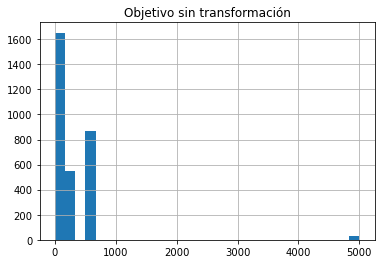

In [324]:
# Get the distribution of sold unities
ax = df_target_plot.hist(bins=30)
plt.title("Objetivo sin transformación")
plt.show()

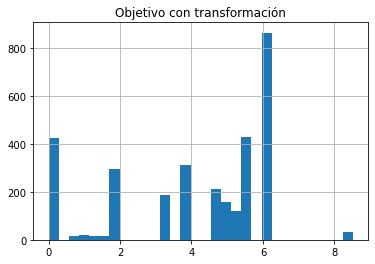

In [341]:
# Get the distribution of sold unities
ax = pd.DataFrame(np.log(df_target_plot +1)).hist(bins=30)
plt.title("Objetivo con transformación")
plt.show()

In [325]:
y_test = np.zeros(len(df_target_plot))
print("MAE predicting all like zeros :%s" % mean_absolute_error(y_test, df_target_plot.fillna(0)))
print("MSE predicting all like zeros :%s" % mean_squared_error(y_test, df_target_plot.fillna(0)))

MAE predicting all like zeros :256.5161394448031
MSE predicting all like zeros :348335.3308586185


In [380]:
# Function to train a model with kfold test
    
def train_models(model, X, y, model_name, polynomial=0, logs=False): 
    
    if polynomial == 0:
        pass
    else:
        pol = PolynomialFeatures(polynomial)
        X = pol.fit_transform(X)
        
    if logs: 
        y = np.log(y+1)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
        model.fit(x_train, y_train)
        y_predicted = np.exp(model.predict(x_test))
        y_test = np.exp(y_test)
    else: 
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)

    print("%s MAE: %.1f" % (model_name, mean_absolute_error(y_test, y_predicted)))
    print("%s MSE: %.1f \n" % (model_name, mean_squared_error(y_test, y_predicted)))
    
    if model_name == 'Linear regressor': 
        print("%s R2: %.1f \n" % (model_name, r2_score(y_test, y_predicted)))
        

In [381]:
# Basic models on the first iteration
# Models configuration
lr = LinearRegression()
regr = RandomForestRegressor(n_estimators=300,max_depth=3, random_state=42)
gdbc = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

train_models(regr, df_process, df_target, 'RF regressor')
train_models(lr, df_process, df_target, 'Linear regressor')
train_models(gdbc, df_process, df_target, 'Gradient Boosting...')

RF regressor MAE: 175.5
RF regressor MSE: 211598.1 

Linear regressor MAE: 178.1
Linear regressor MSE: 219594.6 

Linear regressor R2: 0.2 

Gradient Boosting... MAE: 176.9
Gradient Boosting... MSE: 265278.1 



In [382]:
# Basic models on the first iteration
# Models configuration
lr = LinearRegression()
regr = RandomForestRegressor(n_estimators=300,max_depth=3, random_state=42)
gdbc = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

train_models(regr, df_process, df_target, 'RF regressor', 0, True)
train_models(lr, df_process, df_target, 'Linear regressor', 0, True)
train_models(gdbc, df_process, df_target, 'Gradient Boosting...', 0, True)

RF regressor MAE: 160.7
RF regressor MSE: 243819.9 

Linear regressor MAE: 148.2
Linear regressor MSE: 244257.3 

Linear regressor R2: 0.1 

Gradient Boosting... MAE: 130.1
Gradient Boosting... MSE: 213420.6 



In [383]:
# Basic models on the second iteration with polynomial features
# Models with polynomial features
train_models(regr, df_process, df_target, 'RF regressor', 2)
train_models(lr, df_process, df_target, 'Linear regressor', 2)
train_models(gdbc, df_process, df_target, 'Gradient Boosting...', 2)

RF regressor MAE: 173.8
RF regressor MSE: 222875.0 

Linear regressor MAE: 318.9
Linear regressor MSE: 1275379.5 

Linear regressor R2: -3.9 

Gradient Boosting... MAE: 172.1
Gradient Boosting... MSE: 268830.7 



In [384]:
# Basic models on the second iteration with polynomial features
# Models with polynomial features
train_models(regr, df_process, df_target, 'RF regressor', 2, True)
train_models(lr, df_process, df_target, 'Linear regressor', 2, True)
train_models(gdbc, df_process, df_target, 'Gradient Boosting...', 2, True)

RF regressor MAE: 163.2
RF regressor MSE: 243426.4 

Linear regressor MAE: 5309727651110495223872505949948166910509056.0
Linear regressor MSE: 26219683187939660734116769537465600096560879071631109737546265513763034669443645863624704.0 

Linear regressor R2: -100570316063319253357830889132725153134544645168534605797658416604921507000017223680.0 

Gradient Boosting... MAE: 132.4
Gradient Boosting... MSE: 220691.1 



***Conclusiones del análisis***

Hasta este punto se ha hecho un análisis básico de tres modelos con métodologias diferentes de optimización cada uno. Hay un largo camino de filtrar y estudiar más a fondo las features generadas y generar una busqueda de parámetros con por ejemplo gridsearch para los algoritmos (excepto el regresor lineal). 

Si vemos el modelo de regresión lineal, vemos que tiene un r2 solo de 0.2, explicando solo el 20% de la variabilidad de las variable independientea a partir de las variables dependientes. 

Adicionalmente, la transformación de a variable dependiente se hizo por un tema de heterocedasticidad que faltó comprobar con los residuos de la regresión, pero la mejora de la predicción apoya la hipotesis de que los datos aleatorios sufren de heterocedasticidad por lo cual requieren una transfomación log o con la librería de transformaciones box-cox por lo menos para mejorar las metricas de la regresión. 

Un tema importante es la evaluación de los modelos de regresión, en este caso se usaron dos metricas; MSE y MAE, dependiendo de la penalidad que se le quiera dar a errores grandes o no, se seleccionará la métrica correspondiente. Bajo el contexto actual, penalizaría los errores grandes a costa un poco del performance de otros errores no tan grandes. 

***Mejoras a tener en cuenta***

- Modelar la busqueda de parámetros con los algoritmos de Random Forest Regressor y de Gradient Boosting Regressor
- Mejorar los features a través de la importancia de los arboles y si es necesario un tema de interpretabilidad hacerlo a través de los coeficientes de la regresión lineal
- Implementar modelos más complejos como xgboost, lightgbm o redes neuronales simples. 
- Incluir más datos de mercado libre en los entrenamientos. 
    
